In [1]:
from src.dataloader import Dataset
from src.ae import AutoEncoder
from src.vae import VariationalAutoEncoder
from sklearn.model_selection import train_test_split

path = 'data/'
scenario = 'no_obj'

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
feature_set = Dataset(path, condition=scenario)
X_train, Y_train, cX_train = feature_set.get_training_set()

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

def tensor_to_numpy(tensor):
    return tensor.cpu().detach().numpy()

X_train, X_val, Y_train, Y_val = tensor_to_numpy(X_train), tensor_to_numpy(X_val), tensor_to_numpy(Y_train), tensor_to_numpy(Y_val)

In [3]:
input_dim = X_train[0].shape
latent_dim = 100

In [4]:
X_train.shape, X_val.shape, input_dim

((4344, 3, 64, 64), (1087, 3, 64, 64), (3, 64, 64))

### AE

In [5]:
# build model
ae = AutoEncoder(input_dim=X_train[0].shape, latent_dim=128)

ae.ae.summary()

Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3, 64, 64)]       0         
                                                                 
 encoder (Functional)        (None, 128)               4433824   
                                                                 
 decoder (Functional)        (None, 3, 64, 64)         4450339   
                                                                 
Total params: 8,884,163
Trainable params: 8,884,163
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train model
ae.train(X_train, X_val, epochs=10, batch_size=32)

Epoch 1/10
136/136 [==============================] - 59s 423ms/step - loss: 0.0453 - val_loss: 0.0062
Epoch 2/10
136/136 [==============================] - 57s 421ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 3/10
136/136 [==============================] - 60s 445ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 4/10
136/136 [==============================] - 64s 472ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 5/10
136/136 [==============================] - 64s 475ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 6/10
136/136 [==============================] - 64s 474ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 7/10
136/136 [==============================] - 64s 469ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 8/10
136/136 [==============================] - 64s 471ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 9/10
136/136 [==============================] - 64s 468ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/10
136/136 [==============================] - 64s 474ms/step - l

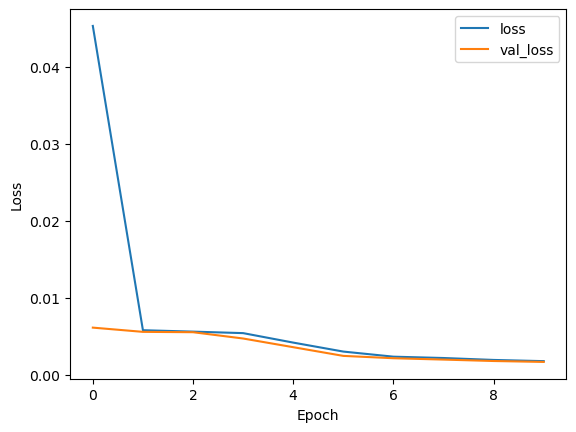

In [7]:
ae.visualize_loss()

### VAE

In [8]:
vae = VariationalAutoEncoder(input_dim=X_train[0].shape, latent_dim=128)
vae.ae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3, 64, 64)]       0         
                                                                 
 encoder (Functional)        [(None, 128),             4466848   
                              (None, 128),                       
                              (None, 128)]                       
                                                                 
 decoder (Functional)        (None, 3, 64, 64)         4450339   
                                                                 
Total params: 8,917,187
Trainable params: 8,917,187
Non-trainable params: 0
_________________________________________________________________


In [9]:
vae.train(X_train, X_val, epochs=10, batch_size=32)

Epoch 1/10
136/136 [==============================] - 65s 462ms/step - loss: 0.0574 - val_loss: 0.0489
Epoch 2/10
136/136 [==============================] - 63s 464ms/step - loss: 0.0432 - val_loss: 0.0083
Epoch 3/10
136/136 [==============================] - 63s 467ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 4/10
136/136 [==============================] - 67s 496ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 5/10
136/136 [==============================] - 65s 478ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 6/10
136/136 [==============================] - 114s 840ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 7/10
136/136 [==============================] - 156s 1s/step - loss: 0.0047 - val_loss: 0.0044
Epoch 8/10
136/136 [==============================] - 182s 1s/step - loss: 0.0038 - val_loss: 0.0030
Epoch 9/10
136/136 [==============================] - 185s 1s/step - loss: 0.0027 - val_loss: 0.0023
Epoch 10/10
136/136 [==============================] - 170s 1s/step - loss: 0.

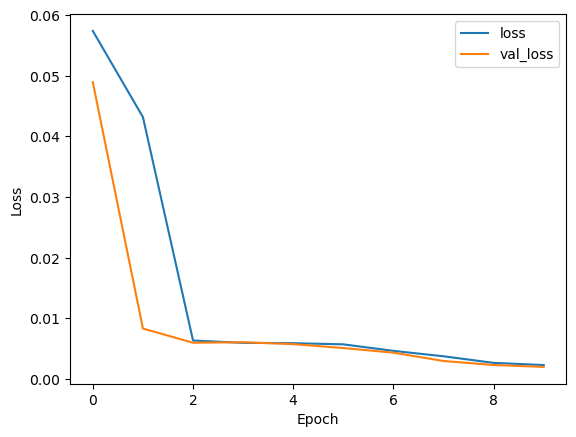

In [10]:
vae.visualize_loss()